# Pre-processing

### 1) Convert all DICOM images to .jpg format

---
Code reads DICOM files and saves them as JPG images after some preprocessing. It performs this operation for different types of MRI images (T1w, T1wCE, T2w) and also removes the original DICOM files after conversion.

The code uses the following libraries:
<ul>
    <li><b>os</b>: for interacting with the file system <br>
    <li><b>cv2 (OpenCV):</b> for saving the processed images as JPG files <br>
    <li><b>numpy:</b> for numerical operations on images <br>
    <li><b>pydicom: </b> for reading DICOM files
</ul>

In [23]:
import os
import cv2 as cv
import numpy as np
import pydicom as PDCM


class DicomConverter:
    def __init__(self, path):
        self.path = path

    def Dicom_to_Image(Path):
        DCM_Img = PDCM.read_file(Path)

        rows = DCM_Img.get(0x00280010).value #Get number of rows from tag (0028, 0010) || retrieves the number of rows in the image, which is stored in the DICOM tag (0028, 0010)
        cols = DCM_Img.get(0x00280011).value #Get number of cols from tag (0028, 0011)  || retrieves the number of columns in the image, which is stored in the DICOM tag (0028, 0011)

        Instance_Number = int(DCM_Img.get(0x00200013).value) #Get actual slice instance number from tag (0020, 0013) | retrieves the instance number of the DICOM image, which is stored in the DICOM tag (0020, 0013).

        Window_Center = int(DCM_Img.get(0x00281050).value) #Get window center from tag (0028, 1050) | retrieves the window center value, which is stored in the DICOM tag (0028, 1050).
        Window_Width = int(DCM_Img.get(0x00281051).value) #Get window width from tag (0028, 1051) | retrieves the window width value, which is stored in the DICOM tag (0028, 1051).

        Window_Max = int(Window_Center + Window_Width / 2) # calculates the maximum pixel value for the window level, by adding half the window width to the window center.
        Window_Min = int(Window_Center - Window_Width / 2) # calculates the minimum pixel value for the window level, by subtracting half the window width from the window center.

        if (DCM_Img.get(0x00281052) is None): # checks if the DICOM tag (0028, 1052), which stores the rescale intercept value, is present in the image. If it is not present, the rescale intercept is set to 0.
            Rescale_Intercept = 0
        else: # If the rescale intercept tag is present, its value is retrieved and converted to an integer.
            Rescale_Intercept = int(DCM_Img.get(0x00281052).value)

        if (DCM_Img.get(0x00281053) is None): # if the DICOM tag (0028, 1053), which stores the rescale slope value, is present in the image. If it is not present, the rescale slope is set to 1.
            Rescale_Slope = 1
        else: #  If the rescale slope tag is present, its value is retrieved and converted to an integer.
            Rescale_Slope = int(DCM_Img.get(0x00281053).value)

        New_Img = np.zeros((rows, cols), np.uint8) #  creates a new NumPy array to store the pixel data for the image, with the same dimensions as the image.
        Pixels = DCM_Img.pixel_array # retrieves the pixel data from the DICOM image and stores it in the Pixels variable.

        for i in range(0, rows):
            for j in range(0, cols):
                Pix_Val = Pixels[i][j]
                Rescale_Pix_Val = Pix_Val * Rescale_Slope + Rescale_Intercept

                if (Rescale_Pix_Val > Window_Max): #if intensity is greater than max window
                    New_Img[i][j] = 255
                elif (Rescale_Pix_Val < Window_Min): #if intensity is less than min window
                    New_Img[i][j] = 0
                else:
                    New_Img[i][j] = int(((Rescale_Pix_Val - Window_Min) / (Window_Max - Window_Min)) * 255) #Normalize the intensities

        return New_Img, Instance_Number
# --------------------------------------------------



class ImageConverter:
    def __init__(self, folder_path):
        self.folder_path = folder_path

    def Convert_T1w():
        for file in os.listdir(Input_Folder_path):
            sub_fold = os.path.join("", file)
            #print("Converting Patient No. :: ",sub_fold)
            Input_Folder = Input_Folder_path+'/'+sub_fold+'/T1w'
            Input_Image_List = os.listdir(Input_Folder)
            for i in range(0, len(Input_Image_List)):
                Output_Image, Instance_Number = Dicom_to_Image(Input_Folder + '/' + Input_Image_List[i])
                cv.imwrite(Input_Folder + '/' + str(Instance_Number - 1).zfill(4) + '.jpg', Output_Image)
        print("Converted All T1w type Images to .jpg")
    # ------------------------------------------------------------
        files_in_directory = os.listdir(Input_Folder)
        filtered_files = [file for file in files_in_directory if file.endswith(".dcm")]
        for file in filtered_files:
            path_to_file = os.path.join(Input_Folder, file)
            os.remove(path_to_file)
        print('Remove all .dcm files from T1w Folders')
    # --------------------------------------------------------------

    def Convert_T1wCE():
        for file in os.listdir(Input_Folder_path):
            sub_fold = os.path.join("", file)
            #print(sub_fold)
            Input_Folder = Input_Folder_path+'/'+sub_fold+'/T1wCE'
            Input_Image_List = os.listdir(Input_Folder)
            for i in range(0, len(Input_Image_List)):
                Output_Image, Instance_Number = Dicom_to_Image(Input_Folder + '/' + Input_Image_List[i])
                cv.imwrite(Input_Folder + '/' + str(Instance_Number - 1).zfill(4) + '.jpg', Output_Image)
        print("Converted All T1wCE type Images to .jpg")
    # ------------------------------------------------------------
        files_in_directory = os.listdir(Input_Folder)
        filtered_files = [file for file in files_in_directory if file.endswith(".dcm")]
        for file in filtered_files:
            path_to_file = os.path.join(Input_Folder, file)
            os.remove(path_to_file)
        print('Remove all .dcm files from T1wCE Folders')
    # --------------------------------------------------------------

    def Convert_T2w():
        for file in os.listdir(Input_Folder_path):
            sub_fold = os.path.join("", file)
            #print(sub_fold)
            Input_Folder = Input_Folder_path+'/'+sub_fold+'/T2w'
            Input_Image_List = os.listdir(Input_Folder)
            for i in range(0, len(Input_Image_List)):
                Output_Image, Instance_Number = Dicom_to_Image(Input_Folder + '/' + Input_Image_List[i])
                cv.imwrite(Input_Folder + '/' + str(Instance_Number - 1).zfill(4) + '.jpg', Output_Image)
        print("Converted All T2w type Images to .jpg")
    # ------------------------------------------------------------
        files_in_directory = os.listdir(Input_Folder)
        filtered_files = [file for file in files_in_directory if file.endswith(".dcm")]
        for file in filtered_files:
            path_to_file = os.path.join(Input_Folder, file)
            os.remove(path_to_file)
        print('Remove all .dcm files from T2w Folders')
    # --------------------------------------------------------------

    def Convert_FLAIR():
        for file in os.listdir(Input_Folder_path):
            sub_fold = os.path.join("", file)
            #print(sub_fold)
            Input_Folder = Input_Folder_path+'/'+sub_fold+'/FLAIR'
            Input_Image_List = os.listdir(Input_Folder)
            for i in range(0, len(Input_Image_List)):
                Output_Image, Instance_Number = Dicom_to_Image(Input_Folder + '/' + Input_Image_List[i])
                cv.imwrite(Input_Folder + '/' + str(Instance_Number - 1).zfill(4) + '.jpg', Output_Image)
        print("Converted All FLAIR type Images to .jpg")
    # ------------------------------------------------------------
        files_in_directory = os.listdir(Input_Folder)
        filtered_files = [file for file in files_in_directory if file.endswith(".dcm")]
        for file in filtered_files:
            path_to_file = os.path.join(Input_Folder, file)
            os.remove(path_to_file)
        print('Remove all .dcm files from FLAIR Folders')
    # --------------------------------------------------------------

def main():
    # create an ImageConverter object
    image_converter = ImageConverter('/home/ibrar/Documents/FYP/Dataset/dataset/train')

    # convert T1w images
    image_converter.Convert_T1w()

    # convert T1wCE images
    image_converter.Convert_T1wCE()

    # convert T2w images
    image_converter.Convert_T2w()

    # convert FLAIR images
    image_converter.Convert_FLAIR()

if __name__ == '__main__':
    main()

Converted All T1w type Images to .jpg
Remove all .dcm files from T1w Folders
Converted All T1wCE type Images to .jpg
Remove all .dcm files from T1wCE Folders
Converted All T2w type Images to .jpg
Remove all .dcm files from T2w Folders
Converted All FLAIR type Images to .jpg
Remove all .dcm files from FLAIR Folders


# 2)Filter High Informative Images
Each type of images for each patient contain black images or images with less brain part or no brain part images, 
This is the Second script which filters the high informative images, and remove less brain part or low brain part while paying special attention to labels


In [87]:
class ImageFilter:
    def __init__(self, folder_path):
        self.folder_path = folder_path
    
    def filter_images(self, image_type):
        for sub_folder in os.listdir(self.folder_path):
            path = os.path.join(self.folder_path, sub_folder, image_type)
            if not os.path.exists(path):
                continue  # skip if folder doesn't exist
            for filename in os.listdir(path):
                images = Image.open(os.path.join(path, filename))
                if np.mean(images) < 8:
                    os.remove(os.path.join(path, filename))
            print(f"Filtered {image_type} type images in {sub_folder}")

filter = ImageFilter('/home/ibrar/Documents/FYP/Dataset/dataset/test')
filter.filter_images('T1w')
filter.filter_images('T1wCE')
filter.filter_images('T2w')
filter.filter_images('FLAIR')


Filtered FLAIR type images in 00208
Filtered FLAIR type images in 00681
Filtered FLAIR type images in 00135
Filtered FLAIR type images in 00662
Filtered FLAIR type images in 00829
Filtered FLAIR type images in 00355
Filtered FLAIR type images in 00749
Filtered FLAIR type images in 00535
Filtered FLAIR type images in 00013
Filtered FLAIR type images in 00474
Filtered FLAIR type images in 00182
Filtered FLAIR type images in 00381
Filtered FLAIR type images in 00125
Filtered FLAIR type images in 00769
Filtered FLAIR type images in 00015
Filtered FLAIR type images in 00447
Filtered FLAIR type images in 00307
Filtered FLAIR type images in 00702
Filtered FLAIR type images in 00229
Filtered FLAIR type images in 00181
Filtered FLAIR type images in 00213
Filtered FLAIR type images in 00190
Filtered FLAIR type images in 00489
Filtered FLAIR type images in 00335
Filtered FLAIR type images in 00438
Filtered FLAIR type images in 00323
Filtered FLAIR type images in 00428
Filtered FLAIR type images i

# 3) Make folders of label data sets
Here we have a CSV file that contains the labels associated with each patient ID. <br>
We will use this information to create labeled datasets for each patient, where the labels indicate whether the sample belongs to class 1 (methyl) or class 0 (unmethyl).

In [90]:
import shutil
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Load the CSV file
df = pd.read_csv('/home/ibrar/Documents/FYP/train_labels.csv')
df.head(10)

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
5,8,1
6,9,0
7,11,1
8,12,1
9,14,1


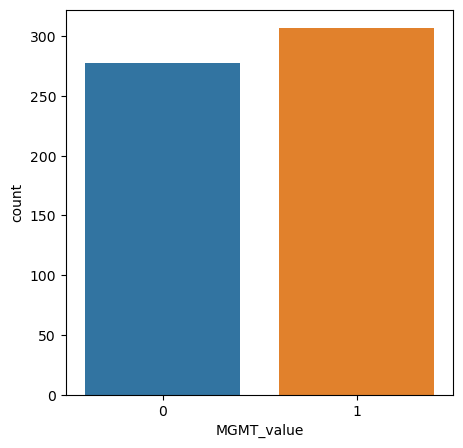

In [93]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x="MGMT_value");

In [32]:
# Get the list of folders in the source directory
source = "/home/ibrar/Documents/FYP/Dataset/dataset/train/"
folders = os.listdir(source)

In [33]:
# Iterate over the folders
for folder in folders:
    # Get the corresponding row in the CSV file
    row = df.loc[df['BraTS21ID'] == int(folder)]
    if not row.empty:
        # Get the value of MGMT_value for the folder
        mgmt_value = row.iloc[0]['MGMT_value']
        
        # Move the folder to the appropriate destination
        if mgmt_value == 0:
            destination = '/home/ibrar/Labeled DataSet/zero/'
        else:
            destination = '/home/ibrar/Labeled DataSet/one/'
        shutil.move(os.path.join(source, folder), destination)

# 4) Making labels for all 4 types of Images

Code will organize a labeled dataset that contains four types of MRI images: T1w, T1wCE, T2w, and FLAIR. <br>
The organized dataset will have a folder for each image type and a subfolder for each label (zero or one) for each subfolder in the original dataset. <br>
This can help evaluate the accuracy of machine learning models on each image type separately.

In [36]:
import os
import shutil


class DatasetOrganizer:
    def __init__(self, main_path, subfolders):
        self.main_path = main_path
        self.subfolders = subfolders
        
    def create_folders(self, label):
        for subfolder in self.subfolders:
            os.makedirs(os.path.join(self.main_path, subfolder, label), exist_ok=True)
        
    def organize_dataset(self):
        for label in ['zero', 'one']:
            self.create_folders(label)
            for folder_name in os.listdir(os.path.join(self.main_path, label)):
                for subfolder in self.subfolders:
                    if os.path.isdir(os.path.join(self.main_path, label, folder_name, subfolder)):
                        os.makedirs(os.path.join(self.main_path, subfolder, label, folder_name, subfolder), exist_ok=True)
                        shutil.copytree(os.path.join(self.main_path, label, folder_name, subfolder),
                                        os.path.join(self.main_path, subfolder, label, folder_name, subfolder),
                                        dirs_exist_ok=True)


# Example usage
main_path = '/home/ibrar/Labeled DataSet/'
subfolders = ['T1w', 'T1wCE', 'T2w', 'FLAIR']

organizer = DatasetOrganizer(main_path, subfolders)
organizer.organize_dataset()


In [46]:
import os
import shutil

class DatasetOrganizer:
    def __init__(self, main_path, subfolders):
        self.main_path = main_path
        self.subfolders = subfolders
    
    def organize(self):
        # Define the label folders to be removed after organizing the dataset
        label_folders = ['zero', 'one']
        
        # Loop through each subfolder
        for subfolder in self.subfolders:
            # Create a new folder for each label ('zero' and 'one') inside the 'T1w', 'T1wCE', 'T2w', or 'FLAIR' folder
            for label in label_folders:
                os.makedirs(os.path.join(self.main_path, subfolder, label), exist_ok=True)

                # Loop through each folder in the main directory
                for folder_name in os.listdir(os.path.join(self.main_path, label)):
                    # Check if the folder contains the subfolder we're interested in
                    if os.path.isdir(os.path.join(self.main_path, label, folder_name, subfolder)):
                        # Create a new folder inside the appropriate label folder inside the 'T1w', 'T1wCE', 'T2w', or 'FLAIR' folder
                        os.makedirs(os.path.join(self.main_path, subfolder, label, folder_name, subfolder), exist_ok=True)

                        # Copy the subitems of the subfolder to the appropriate label folder inside the 'T1w', 'T1wCE', 'T2w', or 'FLAIR' folder
                        shutil.copytree(os.path.join(self.main_path, label, folder_name, subfolder), 
                                        os.path.join(self.main_path, subfolder, label, folder_name, subfolder),
                                        dirs_exist_ok=True)

        # Remove the original 'zero' and 'one' folders
        for label in label_folders:
            shutil.rmtree(os.path.join(self.main_path, label))

        print('Dataset organized successfully!')
        

if __name__ == '__main__':
    main_path = '/home/ibrar/Documents/FYP/Labeled DataSet/'
    subfolders = ['T1w', 'T1wCE', 'T2w', 'FLAIR']

    # Create an instance of the DatasetOrganizer class
    dataset_organizer = DatasetOrganizer(main_path, subfolders)

    # Call the organize() method to organize the dataset
    dataset_organizer.organize()



Dataset organized successfully!
